# Practical Machine Learning for Physicists
## Week 4 Exercise - Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
import random
from tqdm import tqdm


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2023-02-13 16:52:34.980507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [32]:
#download dataset
mnist= keras.datasets.mnist
(train_img,train_lbl),(test_img,test_lbl)=mnist.load_data()

#normalize both the training and testing images
train_img=train_img/np.max(train_img)
test_img=test_img/np.max(test_img)

#shape of datasets:
print('How many Images in training dataset: ',train_img[:,0,0].shape)
print('Shape of train labels: ',train_lbl.shape[0])#makes sense they should match
print('How many Images in testing dataset: ',test_img[:,0,0].shape)
print('Shape of test labels: ',test_lbl.shape[0])#makes sense they should match
print('Each image has ',train_img[0,0].shape[0],'pixels x ',train_img[0,1].shape[0],'pixels')

How many Images in training dataset:  (60000,)
Shape of train labels:  60000
How many Images in testing dataset:  (10000,)
Shape of test labels:  10000
Each image has  28 pixels x  28 pixels


In [33]:
#creating the CNN model
cnn_mnist= keras.Sequential(name='5_layers')
#1 convulational layer with input shape if image of training data images
cnn_mnist.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
#average pooling rather than maxpooling becuase it focuses on the overall distribution
#of activations for improved digit classification.
cnn_mnist.add(keras.layers.AveragePooling2D((2,2)))
#flatten to fead to the dense layers
cnn_mnist.add(keras.layers.Flatten())
cnn_mnist.add(keras.layers.Dense(64, activation='relu'))
#final dense layer with 10 nodes for the ten possible digits
cnn_mnist.add(keras.layers.Dense(10))

2023-02-13 17:02:23.686496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Comments
First lets use a simple model with a Convulational layer an average pooling layer and 2 dense layers, teh final layer of the 2 dense id for the possible outputs of our model (10).
Later we will change a bit this model to see if we can improve it with different layers.


In [34]:
#COMPILE THE MODEL WITH ADAM AND CATEGORICAL CROSSENTROPY
cnn_mnist.compile(optimizer='adam',#adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=cnn_mnist.fit(train_img, train_lbl, epochs=6,
                 validation_data=(test_img,test_lbl))# we are training over 6 epochs considering that ts a relatively simple dataset 


Epoch 1/6
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2085 - accuracy: 0.9392 - val_loss: 0.0825 - val_accuracy: 0.9744
Epoch 2/6
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0709 - accuracy: 0.9793 - val_loss: 0.0591 - val_accuracy: 0.9811
Epoch 3/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 4/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0577 - val_accuracy: 0.9825
Epoch 5/6
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 6/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0466 - val_accuracy: 0.9855


## Comparing different 1 Convlutional layer model

#### <u>Next cell will save a model in your computer do not run in case only interested in the model above !!!!</u>

In [40]:
#save model of 5 layers and 6 epochs
cnn_mnist.save('5_layer_model') 

#load the saved model
loaded_model = tf.keras.models.load_model('5_layer_model')
print(len(loaded_model.layers))
#get the layers from the saved model
layers = [layer for layer in loaded_model.layers]


INFO:tensorflow:Assets written to: 5_layer_model/assets


INFO:tensorflow:Assets written to: 5_layer_model/assets


Do you want to run the code for the model with 3 extra layers?(yes/no):
the model with 3 extra layers is not being created
Model: "5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 28)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 64)                302912    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
T

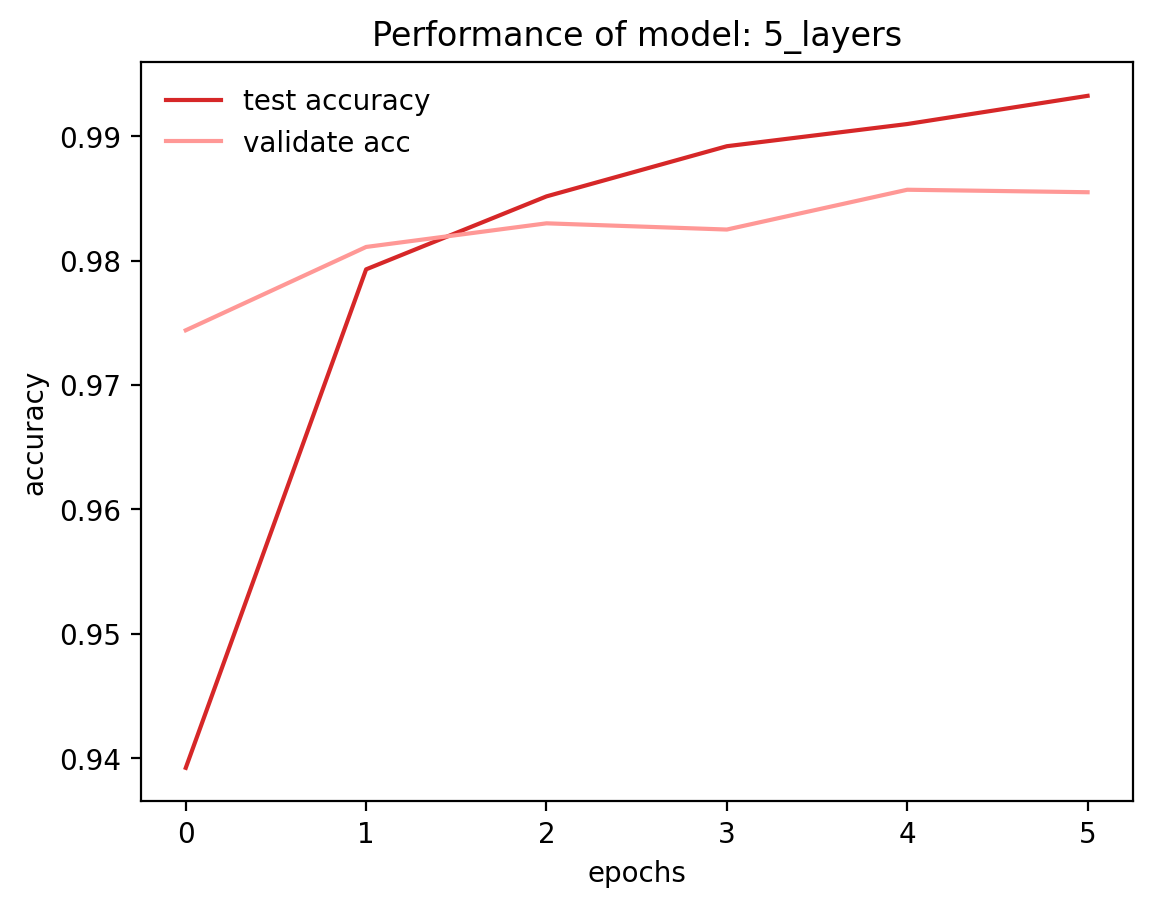

First model:  0.9932500123977661 accuracy on training data and  0.9854999780654907  for validation data


In [71]:
#ASK IF WANNA USE THE NEW 7 LAYER MODEL OR NOT
answer = input("Do you want to run the code for the model with 3 extra layers?(yes/no):\nWARNING: It will take a lot of time if yes. Only use to test the addition of 3 layers to accuracy ")

if answer.lower() == 'yes':
    #create the new model with the added layers
    cnn_mnist7 = keras.Sequential(name='7_layers')
    cnn_mnist7.add(layers[0])
    cnn_mnist7.add(layers[1])
    cnn_mnist7.add(keras.layers.Dropout(0.2))
    cnn_mnist7.add(keras.layers.Dense(128, activation='relu'))
    cnn_mnist7.add(layers[2])
    cnn_mnist7.add(keras.layers.Dense(64, activation='relu', input_shape=(4732,)))#to fit the shape of the flatten layer
    cnn_mnist7.add(layers[4])
    
    #print the summary of the new and the old one
    print(cnn_mnist7.summary(), cnn_mnist.summary())
    
    # TRAIN 2ND MODEL
    cnn_mnist7.compile(optimizer='adam',#adam optimizer
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history7=cnn_mnist7.fit(train_img, train_lbl, epochs=6,
                     validation_data=(test_img,test_lbl))# we are training over 6 epochs considering that ts a relatively
    
    # PLOT OF NEW MODEL VS OLD MODEL ACCURACY
    #old model(5_layer)
    plt.plot(history.history['accuracy'],label='test accuracy',color="#d62728")
    plt.plot(history.history['val_accuracy'],label='validate acc',color="#ff9896")
    #new model(7_layer)
    plt.plot(history7.history['accuracy'],label='test acc. for 7l model',color="#7f7f7f")
    plt.plot(history7.history['val_accuracy'],label='validate acc. for 7l model',color="#c7c7c7")
    plt.title('Performance of the models compared')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    
    #ACCURACIES
    print('First model: ',history.history['accuracy'][-1],'accuracy on training data and ',history.history['val_accuracy'][-1],' for validation data')
    print('Second model: ',history7.history['accuracy'][-1],'accuracy on training data and ',history7.history['val_accuracy'][-1],' for validation data')


elif answer.lower()=='no':
    print('the model with 3 extra layers is not being created')
    #summary
    print(cnn_mnist.summary())
    #PLOT OF OLD MODEL(5_layer)
    plt.plot(history.history['accuracy'],label='test accuracy',color="#d62728")
    plt.plot(history.history['val_accuracy'],label='validate acc',color="#ff9896")
    plt.legend()
    plt.title('Performance of model: '+ cnn_mnist.name)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    
    #ACCURACY
    print('First model: ',history.history['accuracy'][-1],'accuracy on training data and ',history.history['val_accuracy'][-1],' for validation data')


## Comments
- The addition of extra layers doesn't really improve much the model.
Definetely it is not worth it neither efficient since it takes too much time and power to train the 7_layer model. Even though the validation accuracy imrpoves slightly, is a very small change that doesn't beneficiate the efficency of the model.

- It is also importnat to add that the results change when using MaxPooling2D vs AveragePooling2D, given better results when using the last one.
Overall it is achieved a very good accuracy in both the validation and trianing dataset, slightly better on the training maybe due to some overfitting but the change is really small.
Therefore the final accuracy of the model is of 99% approx. with an (98.549%) for the validation data.


## Task 2

Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?


In [56]:
#creating the CNN model
cnn_multi= keras.Sequential()
#first convulational layer with same input shape as before (same dataset)
cnn_multi.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#average pooling becuase of the reasons stated before
cnn_multi.add(keras.layers.AveragePooling2D((2,2)))

cnn_multi.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_multi.add(keras.layers.AveragePooling2D((1,1)))

cnn_multi.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cnn_multi.add(keras.layers.AveragePooling2D((2,2)))
#flatten to dense layers
cnn_multi.add(keras.layers.Flatten())
cnn_multi.add(keras.layers.Dense(128, activation='relu'))
cnn_multi.add(keras.layers.Dense(64, activation='relu'))
#final layer without activation fucntion for 10 possible results
cnn_multi.add(keras.layers.Dense(10))

In [57]:
cnn_multi.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_10 (Avera  (None, 13, 13, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_11 (Avera  (None, 11, 11, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 average_pooling2d_12 (Avera  (None, 4, 4, 128)       

In [58]:
#COMPILE THE MODEL WITH ADAM AND CATEGORICAL CROSSENTROPY
cnn_multi.compile(optimizer='adam',#adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit model 
history_m=cnn_multi.fit(train_img, train_lbl, epochs=6,
                 validation_data=(test_img,test_lbl))

Epoch 1/6
1875/1875 [==============================] - 112s 59ms/step - loss: 0.1388 - accuracy: 0.9578 - val_loss: 0.0475 - val_accuracy: 0.9844
Epoch 2/6
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 3/6
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 4/6
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 5/6
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0216 - val_accuracy: 0.9924
Epoch 6/6
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0313 - val_accuracy: 0.9921


## Performance of our 3CNN model

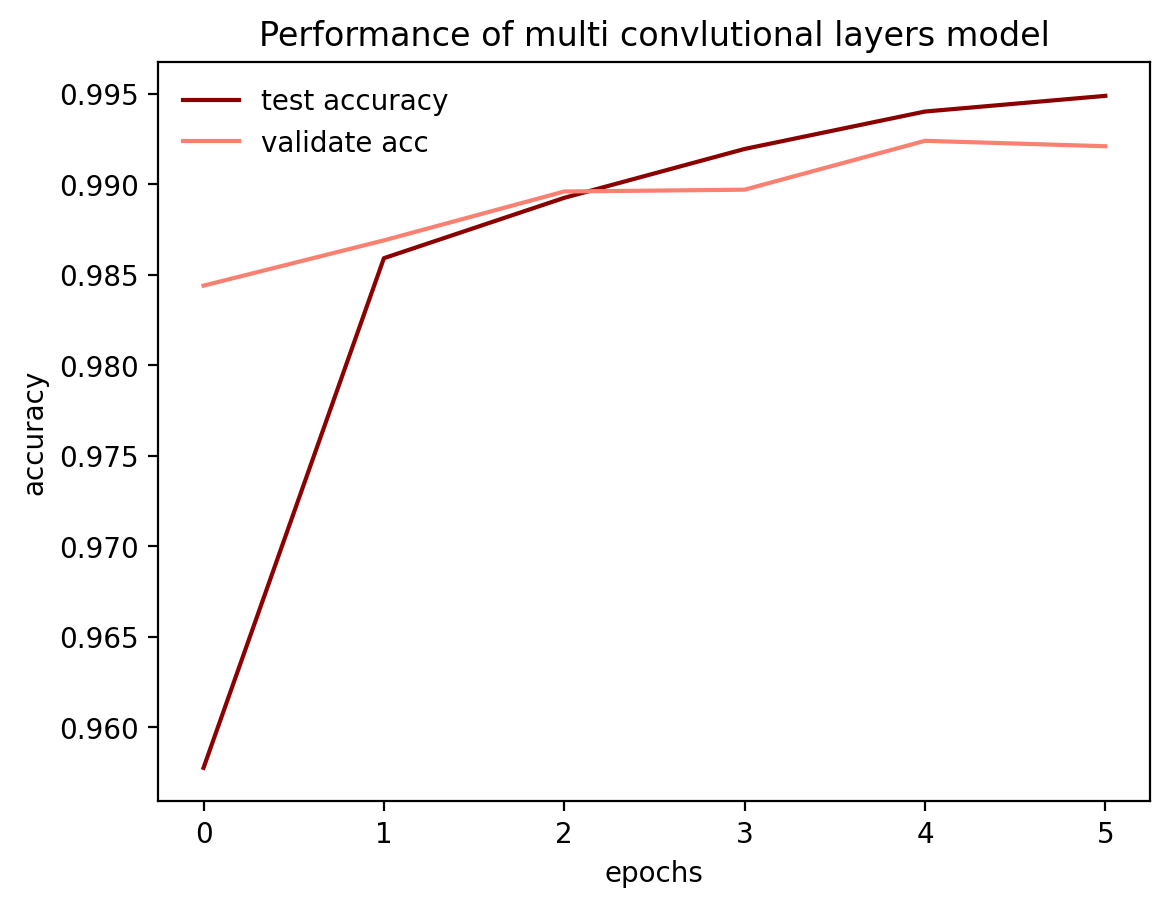

In [73]:
#plot of test vs validation accuracy 
plt.plot(history_m.history['accuracy'],label='test accuracy',color='darkred')
plt.plot(history_m.history['val_accuracy'],label='validate acc',color='salmon')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Performance of multi convlutional layers model')
plt.legend()

In [64]:
print(history_m.history['accuracy'][-1],'accuracy for training and ',history_m.history['val_accuracy'][-1],' for validation data')

0.9948833584785461 accuracy for training and  0.9921000003814697  for validation data


## Compare validation data of the models

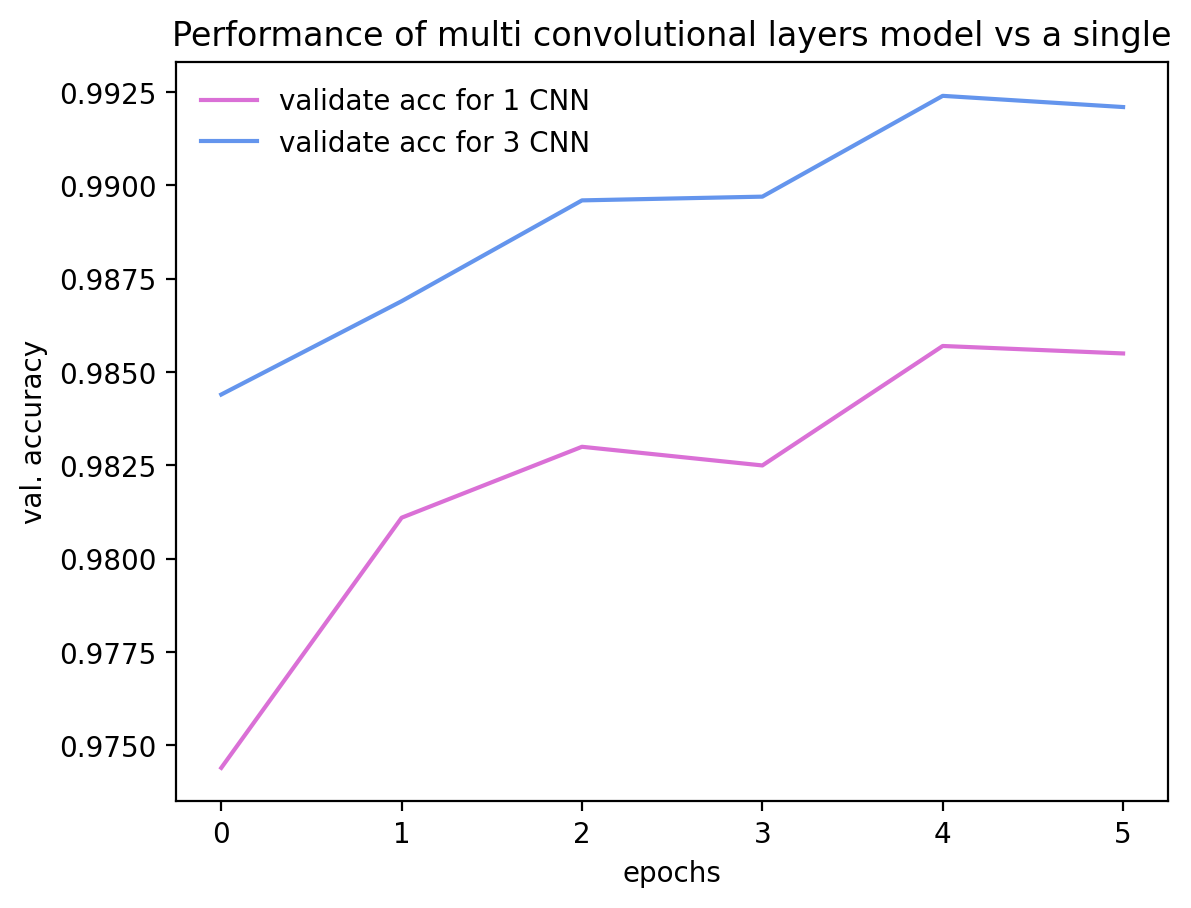

In [91]:
#final plot to compare validation data accuracy of our models
plt.plot(history.history['val_accuracy'],label='validate acc for 1 CNN',color='Orchid')
plt.plot(history_m.history['val_accuracy'],label='validate acc for 3 CNN',color='CornflowerBlue')
#plt.ylim([0.9, 1]) #zoom in
plt.xlabel('epochs')
plt.ylabel('val. accuracy')
plt.title('Performance of multi convolutional layers model vs a single')
plt.legend()

## Comments
- The first observation that we can make is that the 3 convolution layers model takes much more time to train. This is something very important that we shall take into account when creating and training models especially for a simple dataset such as teh MNIST.
- On the toher hand it gives a better result on accuracy as we cna see in teh last plot where there is a jump of 0.01 in accuracy between the models.
However I believe it is not worth the trouble and such the previous model was more efficient.
- Another interesting difference between the models is that in the case of 3 convolutions the difference between training and validation accuracy is lower which means that adding more convolutions layers result in less overfitting.
- Finally another interesting result is the shape of validation accuracy functions is simialr for both models with a first maximum at epoch=2 and slow decrease (minimum) at epoch=3 and a maximum at epoch=4 and then coming to a more constant accuracy. When trained on 6 epochs.
- The final accuracy of the 3 convolution layer model is of 99% with (99.21%) for validation and (99.48%) for the training accuracy.